Chi-square statistic: 18.546971856098065, p-value: 0.04640873830421839


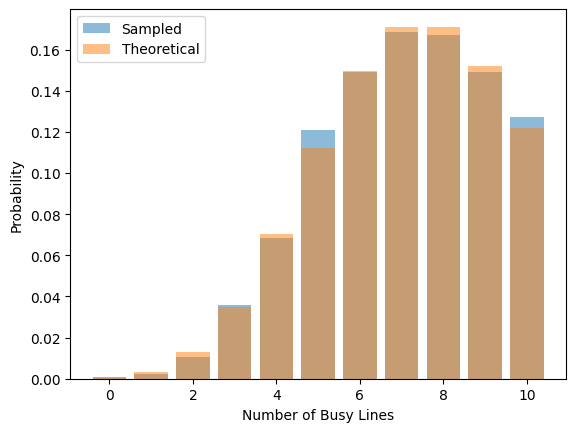

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Parameters
A = 8  # Offered traffic
m = 10  # Maximum number of busy lines
c = 1 / sum([A**i / np.math.factorial(i) for i in range(m+1)])  # Normalization constant

# Truncated Poisson distribution probability mass function
def truncated_poisson_pmf(i, A, m):
    if i > m:
        return 0
    return c * (A**i / np.math.factorial(i))

# Metropolis-Hastings algorithm to generate samples
def metropolis_hastings(A, m, n_samples):
    samples = []
    current = np.random.randint(0, m+1)
    for _ in range(n_samples):
        proposal = np.random.randint(0, m+1)
        alpha = min(1, truncated_poisson_pmf(proposal, A, m) / truncated_poisson_pmf(current, A, m))
        if np.random.rand() < alpha:
            current = proposal
        samples.append(current)
    return np.array(samples)

# Generate samples
n_samples = 10000
samples = metropolis_hastings(A, m, n_samples)

# Calculate sample frequencies
sample_counts = np.bincount(samples, minlength=m+1)
sample_probs = sample_counts / n_samples

# Theoretical probabilities
theoretical_probs = [truncated_poisson_pmf(i, A, m) for i in range(m+1)]
theoretical_counts = np.array(theoretical_probs) * n_samples

# Chi-square test
chi2_stat, p_value = chisquare(sample_counts, f_exp=theoretical_counts)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Plot histogram comparison
plt.bar(range(m+1), sample_probs, alpha=0.5, label='Sampled')
plt.bar(range(m+1), theoretical_probs, alpha=0.5, label='Theoretical')
plt.xlabel('Number of Busy Lines')
plt.ylabel('Probability')
plt.legend()
plt.show()


Chi-square statistic: 188.23684245855804, p-value: 6.359021696268388e-14


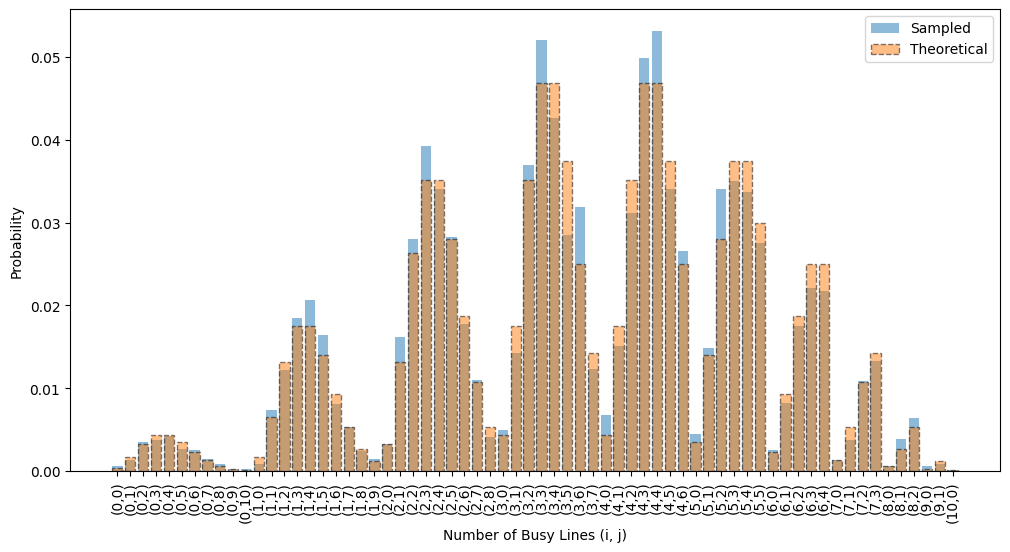

In [4]:


# Parameters
A1 = 4
A2 = 4
m = 10
c = 1 / sum([A1**i / np.math.factorial(i) * sum([A2**j / np.math.factorial(j) for j in range(m - i + 1)]) for i in range(m + 1)])

# Joint truncated Poisson distribution probability mass function
def truncated_poisson_joint_pmf(i, j, A1, A2, m):
    if i + j > m:
        return 0
    return c * (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))

# Metropolis-Hastings algorithm to generate samples
def metropolis_hastings_joint(A1, A2, m, n_samples):
    samples = []
    current = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    while current[0] + current[1] > m:
        current = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    
    for _ in range(n_samples):
        proposal = (np.random.randint(0, m+1), np.random.randint(0, m+1))
        while proposal[0] + proposal[1] > m:
            proposal = (np.random.randint(0, m+1), np.random.randint(0, m+1))
        
        alpha = min(1, truncated_poisson_joint_pmf(proposal[0], proposal[1], A1, A2, m) / truncated_poisson_joint_pmf(current[0], current[1], A1, A2, m))
        if np.random.rand() < alpha:
            current = proposal
        samples.append(current)
    
    return np.array(samples)

# Generate samples
n_samples = 10000
samples = metropolis_hastings_joint(A1, A2, m, n_samples)

# Calculate sample frequencies
unique_samples, counts = np.unique(samples, axis=0, return_counts=True)

# Theoretical probabilities for the unique samples
theoretical_probs = np.array([truncated_poisson_joint_pmf(i, j, A1, A2, m) for i, j in unique_samples])
theoretical_counts = theoretical_probs * n_samples

# Ensure sums match
assert np.isclose(counts.sum(), theoretical_counts.sum(), rtol=1e-8)

# Chi-square test
chi2_stat, p_value = chisquare(counts, f_exp=theoretical_counts)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Plot histogram comparison
plt.figure(figsize=(12, 6))
x_labels = [f'({i},{j})' for i, j in unique_samples]
plt.bar(x_labels, counts / n_samples, alpha=0.5, label='Sampled')
plt.bar(x_labels, theoretical_probs, alpha=0.5, edgecolor='black', linestyle='dashed', label='Theoretical')
plt.xlabel('Number of Busy Lines (i, j)')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Chi-square statistic: 108.48540536485652, p-value: 0.0005809890985000453


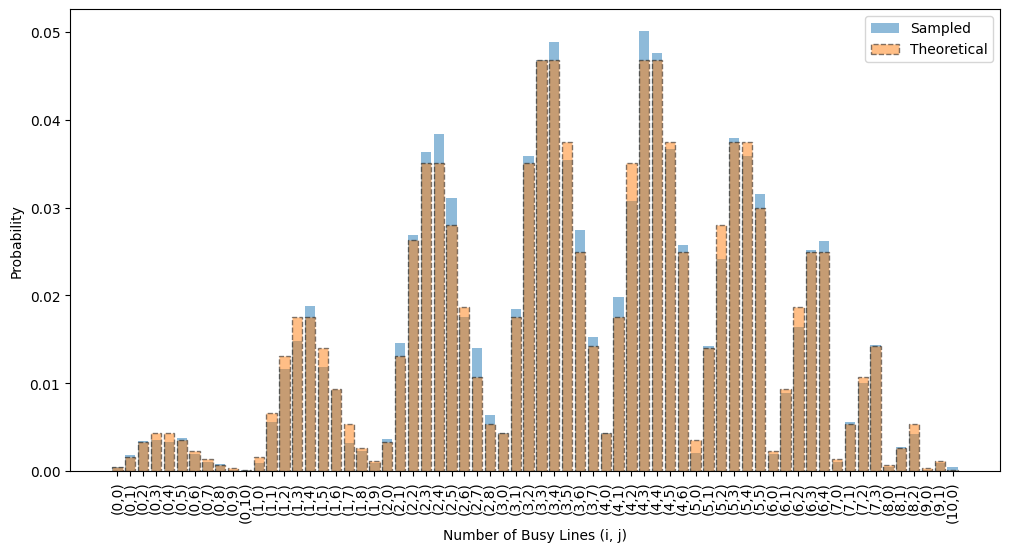

In [6]:

# Joint truncated Poisson distribution probability mass function
def truncated_poisson_joint_pmf(i, j, A1, A2, m):
    if i + j > m:
        return 0
    return c * (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))

# Coordinate-wise Metropolis-Hastings algorithm to generate samples
def metropolis_hastings_coordinatewise(A1, A2, m, n_samples):
    samples = []
    current = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    while current[0] + current[1] > m:
        current = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    
    for _ in range(n_samples):
        for coord in [0, 1]:  # Update each coordinate in turn
            proposal = list(current)
            proposal[coord] = np.random.randint(0, m+1)
            while proposal[0] + proposal[1] > m:
                proposal[coord] = np.random.randint(0, m+1)
            
            alpha = min(1, truncated_poisson_joint_pmf(proposal[0], proposal[1], A1, A2, m) / truncated_poisson_joint_pmf(current[0], current[1], A1, A2, m))
            if np.random.rand() < alpha:
                current = tuple(proposal)
        
        samples.append(current)
    
    return np.array(samples)

# Generate samples
n_samples = 10000
samples = metropolis_hastings_coordinatewise(A1, A2, m, n_samples)

# Calculate sample frequencies
unique_samples, counts = np.unique(samples, axis=0, return_counts=True)

# Theoretical probabilities for the unique samples
theoretical_probs = np.array([truncated_poisson_joint_pmf(i, j, A1, A2, m) for i, j in unique_samples])
theoretical_counts = theoretical_probs * n_samples

# Scale theoretical counts to match observed counts
scaling_factor = counts.sum() / theoretical_counts.sum()
scaled_theoretical_counts = theoretical_counts * scaling_factor

# Chi-square test
chi2_stat, p_value = chisquare(counts, f_exp=scaled_theoretical_counts)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Plot histogram comparison
plt.figure(figsize=(12, 6))
x_labels = [f'({i},{j})' for i, j in unique_samples]
plt.bar(x_labels, counts / n_samples, alpha=0.5, label='Sampled')
plt.bar(x_labels, theoretical_probs, alpha=0.5, edgecolor='black', linestyle='dashed', label='Theoretical')
plt.xlabel('Number of Busy Lines (i, j)')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Chi-square statistic: 62.804084645164885, p-value: 0.5541400000561223


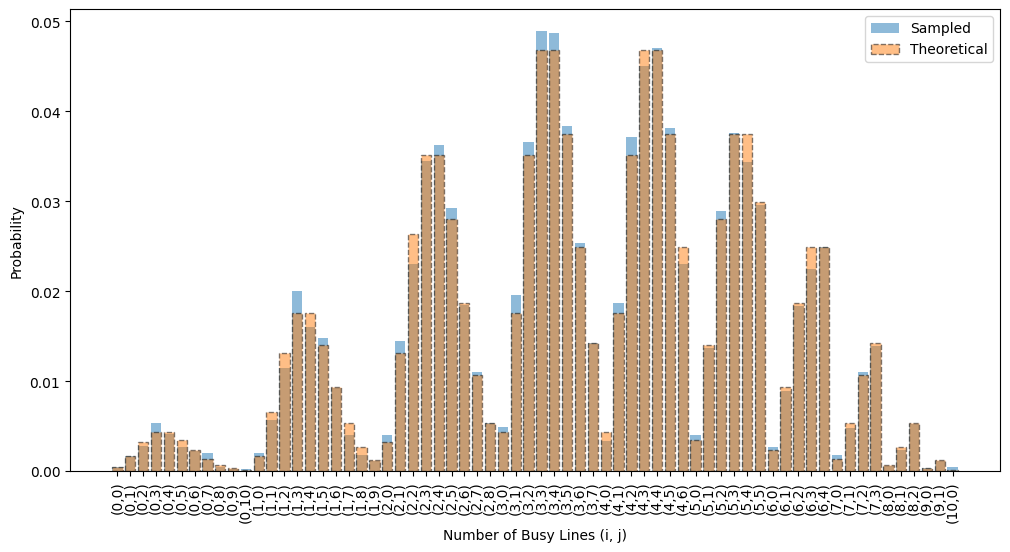

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Parameters
A1 = 4
A2 = 4
m = 10
c = 1 / sum([A1**i / np.math.factorial(i) * sum([A2**j / np.math.factorial(j) for j in range(m - i + 1)]) for i in range(m + 1)])

# Joint truncated Poisson distribution probability mass function
def truncated_poisson_joint_pmf(i, j, A1, A2, m):
    if i + j > m:
        return 0
    return c * (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))

# Conditional distribution P(i | j)
def conditional_p_i_given_j(j, A1, A2, m):
    normalization_constant = sum(A1**i / np.math.factorial(i) for i in range(m - j + 1))
    return [A1**i / np.math.factorial(i) / normalization_constant for i in range(m - j + 1)]

# Conditional distribution P(j | i)
def conditional_p_j_given_i(i, A1, A2, m):
    normalization_constant = sum(A2**j / np.math.factorial(j) for j in range(m - i + 1))
    return [A2**j / np.math.factorial(j) / normalization_constant for j in range(m - i + 1)]

# Gibbs sampling to generate samples
def gibbs_sampling(A1, A2, m, n_samples):
    samples = []
    i, j = np.random.randint(0, m+1), np.random.randint(0, m+1)
    while i + j > m:
        i, j = np.random.randint(0, m+1), np.random.randint(0, m+1)
    
    for _ in range(n_samples):
        p_i_given_j = conditional_p_i_given_j(j, A1, A2, m)
        i = np.random.choice(range(m - j + 1), p=p_i_given_j)
        
        p_j_given_i = conditional_p_j_given_i(i, A1, A2, m)
        j = np.random.choice(range(m - i + 1), p=p_j_given_i)
        
        samples.append((i, j))
    
    return np.array(samples)

# Generate samples
n_samples = 10000
samples = gibbs_sampling(A1, A2, m, n_samples)

# Calculate sample frequencies
unique_samples, counts = np.unique(samples, axis=0, return_counts=True)

# Theoretical probabilities for the unique samples
theoretical_probs = np.array([truncated_poisson_joint_pmf(i, j, A1, A2, m) for i, j in unique_samples])
theoretical_counts = theoretical_probs * n_samples

# Scale theoretical counts to match observed counts
scaling_factor = counts.sum() / theoretical_counts.sum()
scaled_theoretical_counts = theoretical_counts * scaling_factor

# Chi-square test
chi2_stat, p_value = chisquare(counts, f_exp=scaled_theoretical_counts)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Plot histogram comparison
plt.figure(figsize=(12, 6))
x_labels = [f'({i},{j})' for i, j in unique_samples]
plt.bar(x_labels, counts / n_samples, alpha=0.5, label='Sampled')
plt.bar(x_labels, theoretical_probs, alpha=0.5, edgecolor='black', linestyle='dashed', label='Theoretical')
plt.xlabel('Number of Busy Lines (i, j)')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [9]:


# Parameters
rho = 0.5
sigma = np.array([[1, rho], [rho, 1]])  # Covariance matrix

# Target density function f(x, y) for (Theta, Psi)
def target_density(theta, psi):
    log_theta = np.log(theta)
    log_psi = np.log(psi)
    exponent = - (log_theta**2 - 2 * rho * log_theta * log_psi + log_psi**2) / (2 * (1 - rho**2))
    density = np.exp(exponent) / (2 * np.pi * theta * psi * np.sqrt(1 - rho**2))
    return density

# Metropolis-Hastings algorithm for MCMC sampling
def metropolis_hastings_mcmc(n_samples, initial_state, proposal_std):
    samples = []
    current_state = initial_state
    for _ in range(n_samples):
        # Propose new state
        proposed_state = np.random.normal(np.log(current_state), proposal_std)
        proposed_state = np.exp(proposed_state)
        
        # Calculate acceptance probability
        acceptance_ratio = target_density(proposed_state[0], proposed_state[1]) / target_density(current_state[0], current_state[1])
        acceptance_probability = min(1, acceptance_ratio)
        
        # Accept or reject the proposed state
        if np.random.rand() < acceptance_probability:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

# Generate initial sample from prior distribution
n_samples = 10000
initial_xi_gamma = np.random.multivariate_normal([0, 0], sigma)
initial_theta_psi = np.exp(initial_xi_gamma)

# Run Metropolis-Hastings MCMC
proposal_std = 0.1  # Standard deviation for the proposal distribution
samples = metropolis_hastings_mcmc(n_samples, initial_theta_psi, proposal_std)

# Plot the sampled values
theta_samples, psi_samples = samples[:, 0], samples[:, 1]
plt.figure(figsize=(12, 6))
plt.scatter(theta_samples, psi_samples, alpha=0.5, s=1)
plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\Psi$')
plt.title('Samples from the posterior distribution of $(\Theta, \Psi)$')
plt.grid(True)
plt.show()

# Chi-square test
# For simplicity, we will bin the samples and compare to the theoretical prior distribution
bins = 20
hist, xedges, yedges = np.histogram2d(theta_samples, psi_samples, bins=bins)
observed_counts = hist.flatten()
expected_counts = np.ones_like(observed_counts) * observed_counts.sum() / len(observed_counts)

# Chi-square test
chi2_stat, p_value = chisquare(observed_counts, f_exp=expected_counts)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")


Chi-square statistic: 1035311.7599999999, p-value: 0.0


Generated X_i values:
[[-0.03151154 -0.82451177  0.27575081 -0.12841584 -0.11504932  0.47815699
   0.03309091 -0.39522275 -0.17835822 -0.16679864]
 [ 0.05436649 -0.02880492  0.20529797  1.04219307  0.40260632 -0.4549634
  -0.23479266  0.15467651 -0.32052062  0.8272504 ]
 [ 0.21002042  0.66476047  0.09206213  0.06199748  1.16496408  0.32165515
   0.08894271  0.51079945  0.4719451  -0.09519431]
 [ 0.20149255  0.0854728  -0.00353585  0.21217483  0.04310915 -0.15534188
  -0.37552889  0.1460734   0.62638218  0.06224025]
 [ 0.27296052  0.4409206   0.98185036  0.95864851  0.3387425  -0.63200811
   0.57193169 -0.54501851 -0.64374506 -0.32839909]
 [-0.11668764 -0.18840042 -0.24700091  0.25458185  0.70419376  0.16838641
  -0.17328034 -0.20604467  0.05345835  0.06435748]
 [ 0.45667694  1.28199522  1.49049423  0.38823503 -0.05540644  0.39715268
  -0.61016735  0.18562207 -0.10892143  0.36631469]
 [ 1.851211   -0.57498011  2.48924244  1.55529703  1.43744859  1.69309024
   1.28256037  0.48809176  0.1

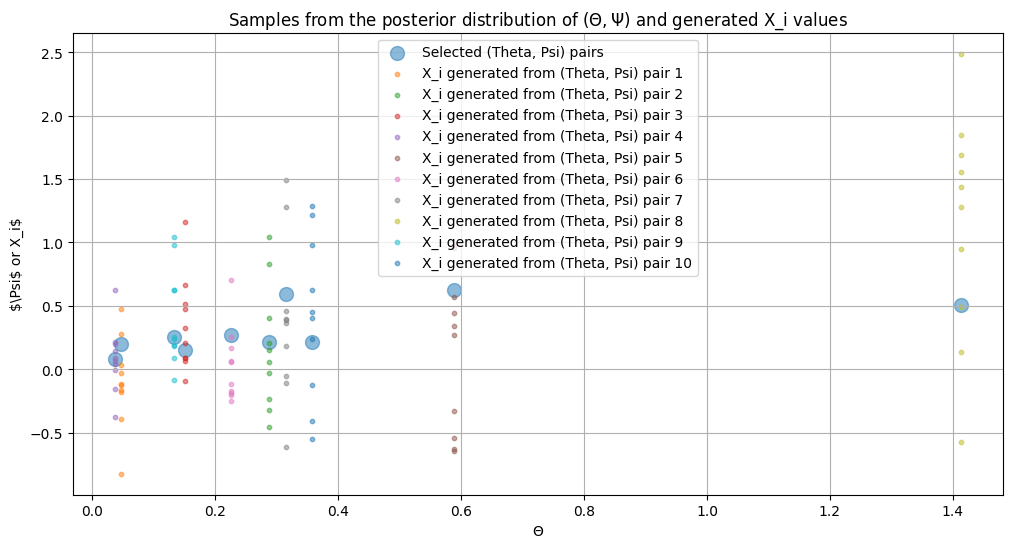

In [10]:

# Parameters
rho = 0.5
sigma = np.array([[1, rho], [rho, 1]])  # Covariance matrix

# Target density function f(x, y) for (Theta, Psi)
def target_density(theta, psi):
    log_theta = np.log(theta)
    log_psi = np.log(psi)
    exponent = - (log_theta**2 - 2 * rho * log_theta * log_psi + log_psi**2) / (2 * (1 - rho**2))
    density = np.exp(exponent) / (2 * np.pi * theta * psi * np.sqrt(1 - rho**2))
    return density

# Metropolis-Hastings algorithm for MCMC sampling
def metropolis_hastings_mcmc(n_samples, initial_state, proposal_std):
    samples = []
    current_state = initial_state
    for _ in range(n_samples):
        # Propose new state
        proposed_state = np.random.normal(np.log(current_state), proposal_std)
        proposed_state = np.exp(proposed_state)
        
        # Calculate acceptance probability
        acceptance_ratio = target_density(proposed_state[0], proposed_state[1]) / target_density(current_state[0], current_state[1])
        acceptance_probability = min(1, acceptance_ratio)
        
        # Accept or reject the proposed state
        if np.random.rand() < acceptance_probability:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

# Generate initial sample from prior distribution
n_samples = 10000
initial_xi_gamma = np.random.multivariate_normal([0, 0], sigma)
initial_theta_psi = np.exp(initial_xi_gamma)

# Run Metropolis-Hastings MCMC
proposal_std = 0.1  # Standard deviation for the proposal distribution
samples = metropolis_hastings_mcmc(n_samples, initial_theta_psi, proposal_std)

# Select 10 samples from the generated (theta, psi) pairs
selected_indices = np.random.choice(len(samples), 10, replace=False)
selected_samples = samples[selected_indices]

# Generate X_i using the selected (theta, psi) pairs
n = 10
X_i = [np.random.normal(theta, np.sqrt(psi), n) for theta, psi in selected_samples]

# Convert X_i to a numpy array for easy handling
X_i = np.array(X_i)

# Print the generated X_i values
print("Generated X_i values:")
print(X_i)

# Plot the sampled values of (theta, psi) and the generated X_i values
theta_samples, psi_samples = selected_samples[:, 0], selected_samples[:, 1]
plt.figure(figsize=(12, 6))
plt.scatter(theta_samples, psi_samples, alpha=0.5, s=100, label='Selected (Theta, Psi) pairs')
for i in range(n):
    plt.scatter([theta_samples[i]] * n, X_i[i], alpha=0.5, s=10, label=f'X_i generated from (Theta, Psi) pair {i+1}')
plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\Psi$ or X_i$')
plt.title('Samples from the posterior distribution of $(\Theta, \Psi)$ and generated X_i values')
plt.legend()
plt.grid(True)
plt.show()


In [11]:

from scipy.stats import norm, invgamma

# Generate sample data (using previously obtained theta and psi)
np.random.seed(42)  # For reproducibility
theta = 5  # Example value for Theta
psi = 2    # Example value for Psi
n = 10     # Sample size

X_i = np.random.normal(theta, np.sqrt(psi), n)
print("Sample X_i values:", X_i)

# Calculate sample mean and sample variance
sample_mean = np.mean(X_i)
sample_variance = np.var(X_i, ddof=1)
print("Sample mean:", sample_mean)
print("Sample variance:", sample_variance)

# Posterior distribution parameters
posterior_mean_theta = sample_mean
posterior_var_theta = psi / n

alpha_posterior = (n-1) / 2
beta_posterior = (n-1) * sample_variance / 2

# Generate posterior samples
n_posterior_samples = 10000
posterior_theta_samples = norm.rvs(loc=posterior_mean_theta, scale=np.sqrt(posterior_var_theta), size=n_posterior_samples)
posterior_psi_samples = invgamma.rvs(a=alpha_posterior, scale=beta_posterior, size=n_posterior_samples)

# Plot posterior samples
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(posterior_theta_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Posterior distribution of Theta')
plt.xlabel('Theta')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(posterior_psi_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('Posterior distribution of Psi')
plt.xlabel('Psi')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Sample X_i values: [5.70245989 4.80446475 5.91596991 7.15388948 4.66885712 4.66888034
 7.23334418 6.0853166  4.33606296 5.76729577]
Sample mean: 5.633654100936348
Sample variance: 1.0454821004736816


In [12]:


# Parameters from the previous derivation
rho = 0.5
n = 10
theta = 5  # Example value for Theta
psi = 2    # Example value for Psi

# Generate sample data
np.random.seed(42)  # For reproducibility
X_i = np.random.normal(theta, np.sqrt(psi), n)
sample_mean = np.mean(X_i)
sample_variance = np.var(X_i, ddof=1)

# Posterior distribution parameters
posterior_mean_theta = sample_mean
posterior_var_theta = psi / n

alpha_posterior = (n-1) / 2
beta_posterior = (n-1) * sample_variance / 2

# Target density function for the posterior distribution
def posterior_density(theta, psi, sample_mean, sample_variance, n):
    # Compute the log of the posterior density for numerical stability
    log_prior = -0.5 * (np.log(theta)**2 + np.log(psi)**2 - 2 * rho * np.log(theta) * np.log(psi)) / (1 - rho**2)
    log_likelihood = -0.5 * n * np.log(psi) - 0.5 * ((n-1) * sample_variance + n * (sample_mean - theta)**2) / psi
    return np.exp(log_prior + log_likelihood)

# Metropolis-Hastings algorithm for MCMC sampling from the posterior
def metropolis_hastings_posterior(n_samples, initial_state, proposal_std, sample_mean, sample_variance, n):
    samples = []
    current_state = initial_state
    for _ in range(n_samples):
        # Propose new state
        proposed_state = np.random.normal(np.log(current_state), proposal_std)
        proposed_state = np.exp(proposed_state)
        
        # Calculate acceptance probability
        acceptance_ratio = posterior_density(proposed_state[0], proposed_state[1], sample_mean, sample_variance, n) / \
                           posterior_density(current_state[0], current_state[1], sample_mean, sample_variance, n)
        acceptance_probability = min(1, acceptance_ratio)
        
        # Accept or reject the proposed state
        if np.random.rand() < acceptance_probability:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

# Initial state for MCMC
initial_theta = sample_mean
initial_psi = sample_variance
initial_state = [initial_theta, initial_psi]

# Run Metropolis-Hastings MCMC
n_posterior_samples = 10000
proposal_std = 0.1  # Standard deviation for the proposal distribution
posterior_samples = metropolis_hastings_posterior(n_posterior_samples, initial_state, proposal_std, sample_mean, sample_variance, n)

# Plot posterior samples
theta_samples, psi_samples = posterior_samples[:, 0], posterior_samples[:, 1]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(theta_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Posterior distribution of Theta')
plt.xlabel('Theta')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(psi_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('Posterior distribution of Psi')
plt.xlabel('Psi')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


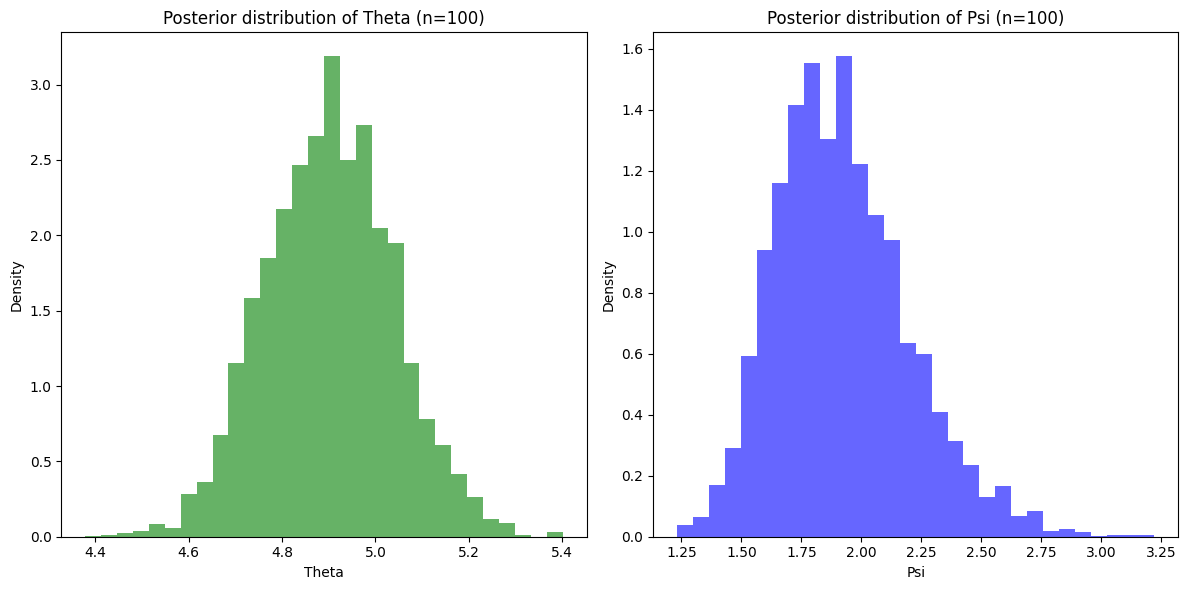

Sample mean for n=100: 4.906584946587426
Sample variance for n=100: 1.8923057087519224
Posterior mean of Theta for n=100: 4.902040683865653
Posterior mean of Psi for n=100: 1.9196965217021342
Posterior variance of Theta for n=100: 0.018962530646317952
Posterior variance of Psi for n=100: 0.07760451839304039




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


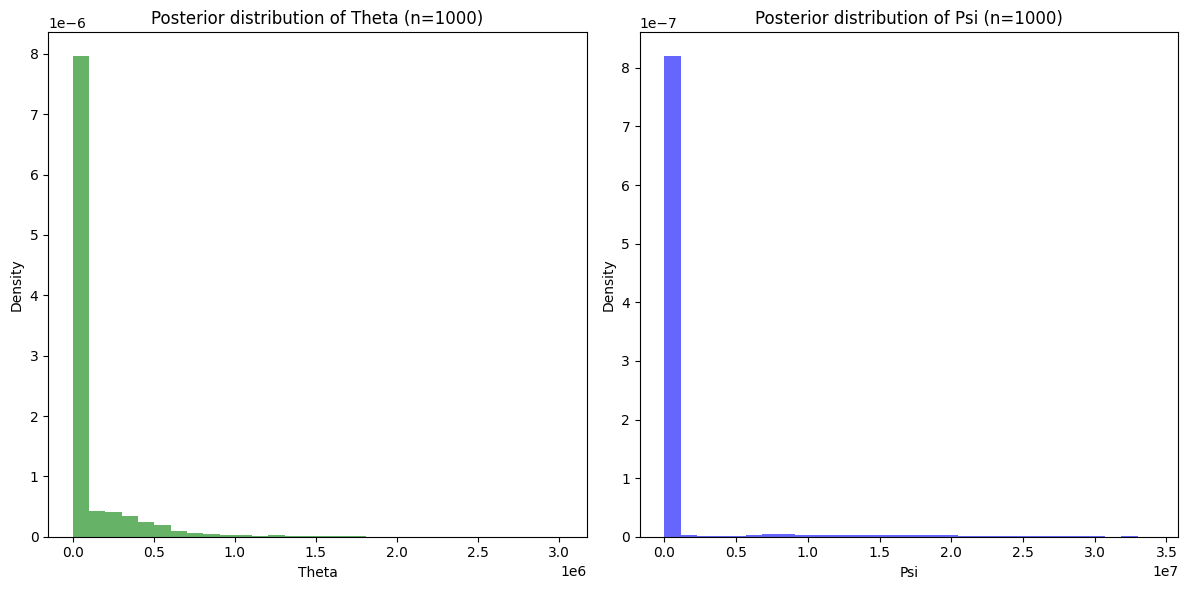

Sample mean for n=1000: 4.978707070022081
Sample variance for n=1000: 2.0573501108781094
Posterior mean of Theta for n=1000: 89750.65177716677
Posterior mean of Psi for n=1000: 965789.5489237341
Posterior variance of Theta for n=1000: 48460910269.19994
Posterior variance of Psi for n=1000: 16092079640184.854




In [13]:


# Parameters from the previous derivation
rho = 0.5
theta = 5  # Example value for Theta
psi = 2    # Example value for Psi

# Function to generate X_i samples and perform MCMC sampling
def generate_samples_and_mcmc(n, theta, psi, n_posterior_samples, proposal_std):
    # Generate sample data
    X_i = np.random.normal(theta, np.sqrt(psi), n)
    sample_mean = np.mean(X_i)
    sample_variance = np.var(X_i, ddof=1)

    # Posterior distribution parameters
    posterior_mean_theta = sample_mean
    posterior_var_theta = psi / n

    alpha_posterior = (n-1) / 2
    beta_posterior = (n-1) * sample_variance / 2

    # Target density function for the posterior distribution
    def posterior_density(theta, psi, sample_mean, sample_variance, n):
        log_prior = -0.5 * (np.log(theta)**2 + np.log(psi)**2 - 2 * rho * np.log(theta) * np.log(psi)) / (1 - rho**2)
        log_likelihood = -0.5 * n * np.log(psi) - 0.5 * ((n-1) * sample_variance + n * (sample_mean - theta)**2) / psi
        return np.exp(log_prior + log_likelihood)

    # Metropolis-Hastings algorithm for MCMC sampling from the posterior
    def metropolis_hastings_posterior(n_samples, initial_state, proposal_std, sample_mean, sample_variance, n):
        samples = []
        current_state = initial_state
        for _ in range(n_samples):
            # Propose new state
            proposed_state = np.random.normal(np.log(current_state), proposal_std)
            proposed_state = np.exp(proposed_state)
            
            # Calculate acceptance probability
            acceptance_ratio = posterior_density(proposed_state[0], proposed_state[1], sample_mean, sample_variance, n) / \
                               posterior_density(current_state[0], current_state[1], sample_mean, sample_variance, n)
            acceptance_probability = min(1, acceptance_ratio)
            
            # Accept or reject the proposed state
            if np.random.rand() < acceptance_probability:
                current_state = proposed_state
            
            samples.append(current_state)
        
        return np.array(samples)

    # Initial state for MCMC
    initial_theta = sample_mean
    initial_psi = sample_variance
    initial_state = [initial_theta, initial_psi]

    # Run Metropolis-Hastings MCMC
    posterior_samples = metropolis_hastings_posterior(n_posterior_samples, initial_state, proposal_std, sample_mean, sample_variance, n)
    
    return X_i, posterior_samples

# Run the analysis for n = 100 and n = 1000
n_values = [100, 1000]
n_posterior_samples = 10000
proposal_std = 0.1

for n in n_values:
    X_i, posterior_samples = generate_samples_and_mcmc(n, theta, psi, n_posterior_samples, proposal_std)
    
    # Plot the results
    theta_samples, psi_samples = posterior_samples[:, 0], posterior_samples[:, 1]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(theta_samples, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Posterior distribution of Theta (n={n})')
    plt.xlabel('Theta')
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    plt.hist(psi_samples, bins=30, density=True, alpha=0.6, color='b')
    plt.title(f'Posterior distribution of Psi (n={n})')
    plt.xlabel('Psi')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Print sample statistics
    print(f"Sample mean for n={n}: {np.mean(X_i)}")
    print(f"Sample variance for n={n}: {np.var(X_i, ddof=1)}")
    print(f"Posterior mean of Theta for n={n}: {np.mean(theta_samples)}")
    print(f"Posterior mean of Psi for n={n}: {np.mean(psi_samples)}")
    print(f"Posterior variance of Theta for n={n}: {np.var(theta_samples)}")
    print(f"Posterior variance of Psi for n={n}: {np.var(psi_samples)}")
    print("\n")
